# Домашнее задание 2.

Продолжаем знакомиться с библиотекой `tensorflow`.

In [371]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Задание 1 -- tensorflow vs numpy (3 балла).

Сравните скорость работы функций над массивами в фреймворках tensorflow и numpy. Для этого реализуйте на нампае и тф'е следующее:

 * Сумму квадратов диагональных элементов квадратной матрицы. Например для матрицы
$$
 \begin{pmatrix}
     1& 0& 5\\
     -2& 8& 12\\
     4& 1& -5
 \end{pmatrix}
$$
 такая сумма будет равна $1^2 + 8^2 + (-5)^2 = 90$.
 * Угол между векторами в n-мерном пространстве. Напомним, что он вычисляется по формуле
 $$
     \arccos \cfrac{\left\langle x, y\right\rangle}{||x||\cdot ||y||}
 $$

 * Сумму элементов коммутатора квадратных матриц $A$ и $B$. Коммутатор матриц это матрица $C = AB - BA$.
 
Постройте графики зависимости времени выполнения операций от размера массивов (в логарифмическй шкале) для каждой задачи для tensorflow и numpy (три рисунка, по два графика на рисунок). Элементы матриц выбирайте случайным образом (через модуль tf.random и np.random соотвтетственно). Какой фреймворк оказывается быстрее? Как Вы думаете, почему?

Можете пользоваться образцом кода ниже.

**Замечание**. Графики должны быть опрятными! Подписывайте оси и единицы измерения, указывайте легенду. За неопрятные графики оценка за задание может быть снижена.

**Подсказка**. Функция time.time() возвращает время в секундах (с высокой точностью), прошедшее от 00:00 1 января 1970 года. Используйте её, чтобы посчитать, сколько длилось выполнение куска кода. Также вам могут пригодиться функции `tf.linalg.norm`, `tf.diag_part`, `tf.acos`, `tf.matmul`

In [337]:
def visualize(number_of_iterations, seconds_tensorflow, seconds_numpy, 
              title='Графики зависимости времени выполнения операций от размера массива',
              xlabel='Размер массива', ylabel='Время выполнения (в секундах)'):
    fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={ 'wspace':1}, figsize=(14, 6))
    
    fig.suptitle(title)
    ax1.plot(number_of_iterations, seconds_tensorflow, c = 'r', label = 'Tensorflow')
    ax1.set(xlabel=xlabel, ylabel=ylabel, label='sd')
    ax1.legend(loc='upper left')
    ax1.set_yscale('log')
    
    ax2.plot(number_of_iterations,seconds_numpy, c = 'b', label = u'Numpy')
    ax2.set(xlabel=xlabel, ylabel=ylabel, label='sd')
    ax2.legend(loc='upper left')
    ax2.set_yscale('log')
    plt.plot()
    
    plt.figure(figsize=(20,10))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(number_, label =i)
    
    
    plt.show()

In [352]:
def visualize(number_of_iterations, seconds_tensorflow, seconds_numpy, 
              title='Графики зависимости времени выполнения операций от размера массива',
              xlabel='Размер массива', ylabel='Время выполнения (в секундах)'):
    
    
    
    plt.figure(figsize=(20,10))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.plot(number_of_iterations, seconds_tensorflow, label ='Tensorflow')
    plt.plot(number_of_iterations, seconds_numpy, label = 'Numpy', c='r')
    plt.yscale('log')
    plt.legend(loc='upper left')
    
    plt.show()

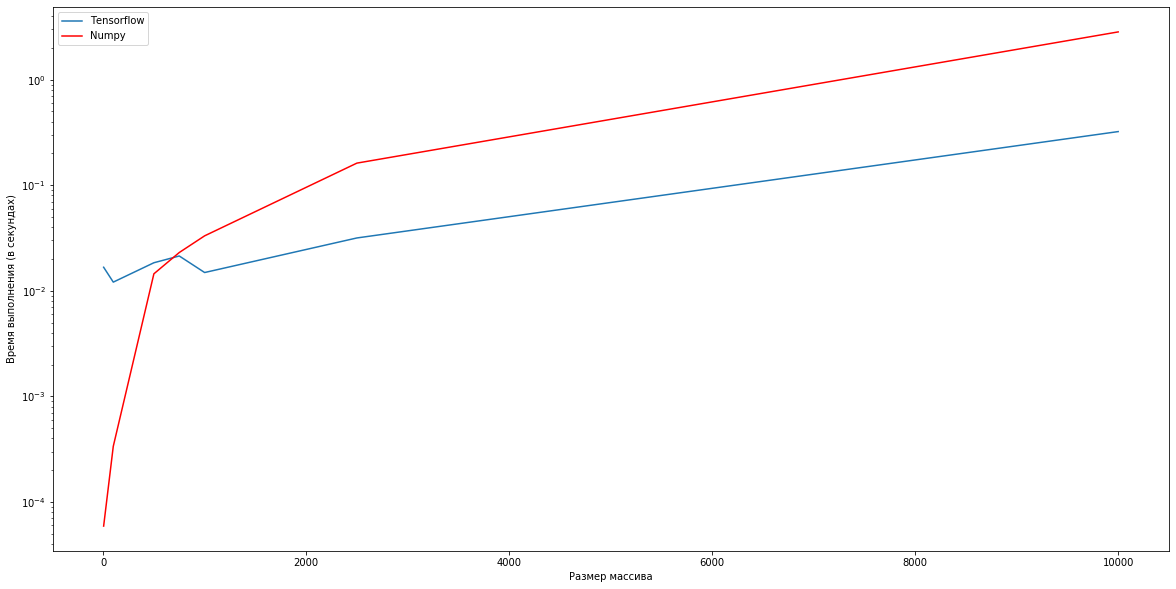

In [353]:
import time
# 1-ое задание, логарифмирование
tf.reset_default_graph()
sess = tf.Session()
size_of_matrix = [5, 100, 500, 750, 1000, 2500, 10000]
time_tensor = []
time_numpy = []

#tf.compat.v1.random.set_random_seed(1234) # узнать


for n in size_of_matrix:
    tf.set_random_seed(105)
    begin = time.time()
    
    x = tf.placeholder(tf.float32, (n, n)) # define array(-s) of size n
    y = tf.reduce_sum(tf.diag_part(x)**2)
    random_n = tf.random.normal((n,n))
    sess.run(y, feed_dict={x: sess.run(random_n)}) 

    end = time.time()
    time_spent_tf = end - begin
    time_tensor.append(time_spent_tf)
    
    np.random.seed(50)
  
    begin = time.time()
    
    np_array_sum = np.sum(np.diagonal(np.random.randn(n,n))**2)
    
    end = time.time()
    
    time_spent_np = end - begin
    time_numpy.append(time_spent_np)
    #print('Numpy time: {}'.format(time_spent))
    
visualize(size_of_matrix, time_tensor, time_numpy)
sess.close()

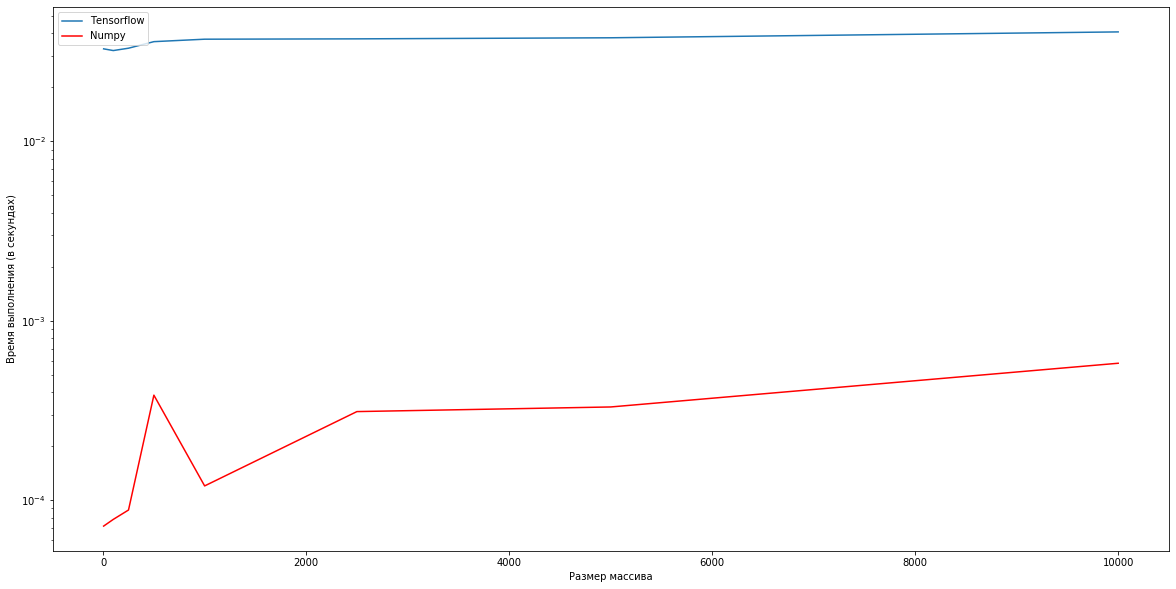

In [354]:
# 2-ое задание
#tf.reset_default_graph()
sess = tf.Session()
dim_of_vector = [5, 100, 250, 500, 1000, 2500, 5000, 10000]
time_tensor = []
time_numpy = []

for n in dim_of_vector:
    tf.set_random_seed(123)
    begin = time.time()
    
    x = tf.placeholder(tf.float32, (n, 1)) # define array(-s) of size n
    y = tf.placeholder(tf.float32, (n, 1))
    z = tf.acos(tf.reduce_sum(x * y)/(tf.linalg.norm(x)*tf.linalg.norm(y)))
    
    x_rand = sess.run(tf.random.normal((n, 1), seed = 50))
    y_rand = sess.run(tf.random.normal((n, 1) , seed = 52))
    z_acos = sess.run(z, feed_dict={x: x_rand , y: y_rand}) 
    
    end = time.time()
    time_spent_tf_2 = end - begin
    
    time_tensor.append(time_spent_tf_2)
    np.random.seed(50)

    begin = time.time()
    x = np.random.randn(n)
    
    y = np.random.randn(n)
    z = np.arccos(np.sum(x*y)/(np.sum(x**2)*np.sum(y**2)))
    
    end = time.time()
    time_spent_np_2 = end - begin
    time_numpy.append(time_spent_np_2)
    
visualize(dim_of_vector, time_tensor, time_numpy, title='Графики зависимости времени выполнения операций от размерности')
sess.close()

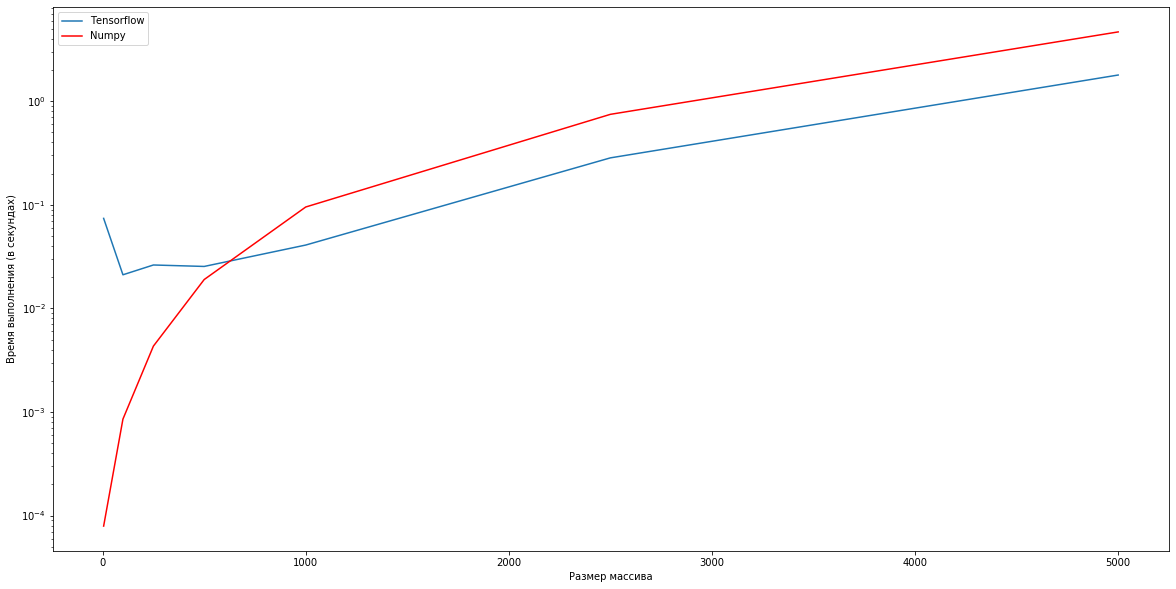

In [355]:
# 3-е задание
tf.reset_default_graph()
sess = tf.Session()
size_of_matrix = [5, 100, 250, 500, 1000, 2500, 5000]
time_tensor = []
time_numpy = []


for n in size_of_matrix:
    
    begin = time.time()
    A = tf.placeholder(tf.float32, (n, n)) # define array(-s) of size n
    B = tf.placeholder(tf.float32, (n, n))
    C = tf.reduce_sum(tf.matmul(A,B)-tf.matmul(B, A))

    sess.run(C, feed_dict={A: sess.run(tf.random.normal((n,n), seed=50)), B: sess.run(tf.random.normal((n,n), seed=52))}) 

    end = time.time()
    time_spent_tf_3 = end - begin
    
    
    time_tensor.append(time_spent_tf_3)
    np.random.seed(50)
    
    begin = time.time()
    A = np.random.randn(n,n)
    B = np.random.randn(n,n)
    C = A @ B - B @ A
    com = np.sum(C)
    end = time.time()
    time_spent_np_3 = end - begin
    
    time_numpy.append(time_spent_np_3)


visualize(size_of_matrix, time_tensor, time_numpy)
sess.close()

###### На графиках видно, что tensorflow работает быстрее с матрицами (тензорами), в то время как numpy опережает в вычислениях с векторами

## Задание 2 -- градиенты и оптимайзеры (3 балла).

Продолжим работать с датасетом MNIST с размером картинок 8х8.

In [356]:
from sklearn.datasets import load_digits

mnist = load_digits()

X, y = mnist.data, mnist.target

n_labels = len(np.unique(y))


Многие алгоритмы оптимизации имплементированы в `tensorflow`. В этом задании мы сравним их при одинаковых параметрах, а также переберём разные параметры для одного алгоритма.

**Задание 2.1** (1.5 балла). Исследуйте вклад параметра momentum в методу `tf.train.MomentumOptimizer`. Для этого для разных значений momentum постройте графики значения функции потерь от номера итерации. При каких значениях momentum алгоритм сходится быстрее? Используйте `learning_rate=0.01`.

**Замечание**. В этом задании используется многоклассовая логистическая регрессия. Не меняйте код модели в ячейке ниже.

In [357]:
tf.reset_default_graph()

w = tf.Variable(np.ones((X.shape[1], n_labels)), dtype="float32")
X_input = tf.placeholder("float32", (None, X.shape[1]))
y_input = tf.placeholder("int32", (None,))

learning_rate=0.01

predicted = tf.nn.softmax(X_input @ w)
loss = tf.losses.log_loss(tf.one_hot(y_input, depth=n_labels), predicted)

In [358]:
def train(X, y, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X) // batch_size
        loss_history = []
        for epoch in range(1):
            
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y[b*batch_size:(b+1)*batch_size]
                                                                 })
                
                loss_history.append(loss_)
                #if n_batch_train % 3 == 0:
                    #if loss_history[b-1] - loss_history[b] < 0.001:
                       # print(loss_history[b-1], loss_history[b])
                        #break
    return loss_history

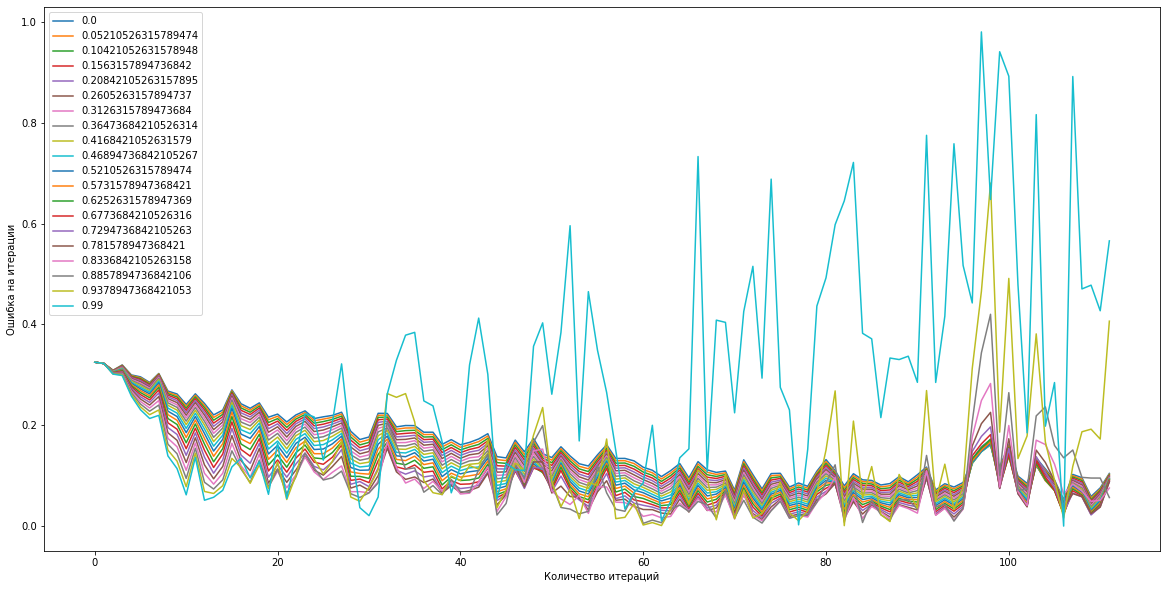

In [359]:
momentum = np.linspace(0., 0.99, 20)
plt.figure(figsize=(20,10))
plt.xlabel('Количество итераций')
plt.ylabel('Ошибка на итерации')


for i in momentum:
    plt_loss = train(X, y, tf.train.MomentumOptimizer(learning_rate, momentum=i).minimize(loss))
   
    plt.plot(plt_loss, label =i)
    plt.legend(loc='upper left')


Увеличим график, чтобы выбрать лучшее значение momentum

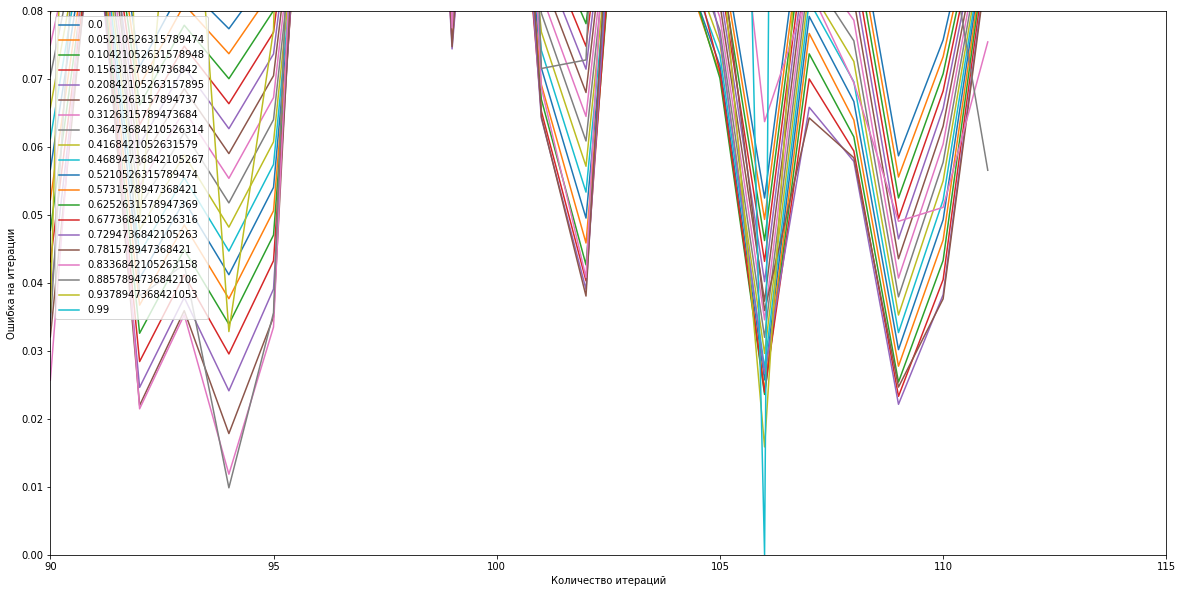

In [360]:
momentum = np.linspace(0., 0.99, 20)
plt.figure(figsize=(20,10))
plt.xlabel('Количество итераций')
plt.ylabel('Ошибка на итерации')
plt.ylim(0, 0.08)
plt.xlim(90, 115)

for i in momentum:
    plt_loss = train(X, y, tf.train.MomentumOptimizer(learning_rate, momentum=i).minimize(loss))
   
    plt.plot(plt_loss, label =i)
    plt.legend(loc='upper left')


Мы видим, что первой до минимума дошел график с momentum = 0.99, поэтому возьмем его в качестве лучшего. Несмотря на то, что этот "валун", катящийся с горы слишком сильно колеблет нашу ошибку, он приводит нас быстрее к результату. Достойны упоминания momentums с 0.67 до 0.83, но они так и не дошли до минимума за 110 итераций.

In [361]:
print(momentum)

[0.         0.05210526 0.10421053 0.15631579 0.20842105 0.26052632
 0.31263158 0.36473684 0.41684211 0.46894737 0.52105263 0.57315789
 0.62526316 0.67736842 0.72947368 0.78157895 0.83368421 0.88578947
 0.93789474 0.99      ]


Ваш ответ: 0.99

**Задание 2.2** (0.5 баллa). Исследуйте вклад `learning_rate`. Для этого для разных значений `learning_rate` постройте графики значения функции потерь от номера итерации. При каких значениях длины шага градиентного спуска алгоритм сходится быстрее? Используйте параметр метод MomentumOptimizer с параметром, который вы считаете лучшим по итогам предыдущего задания.

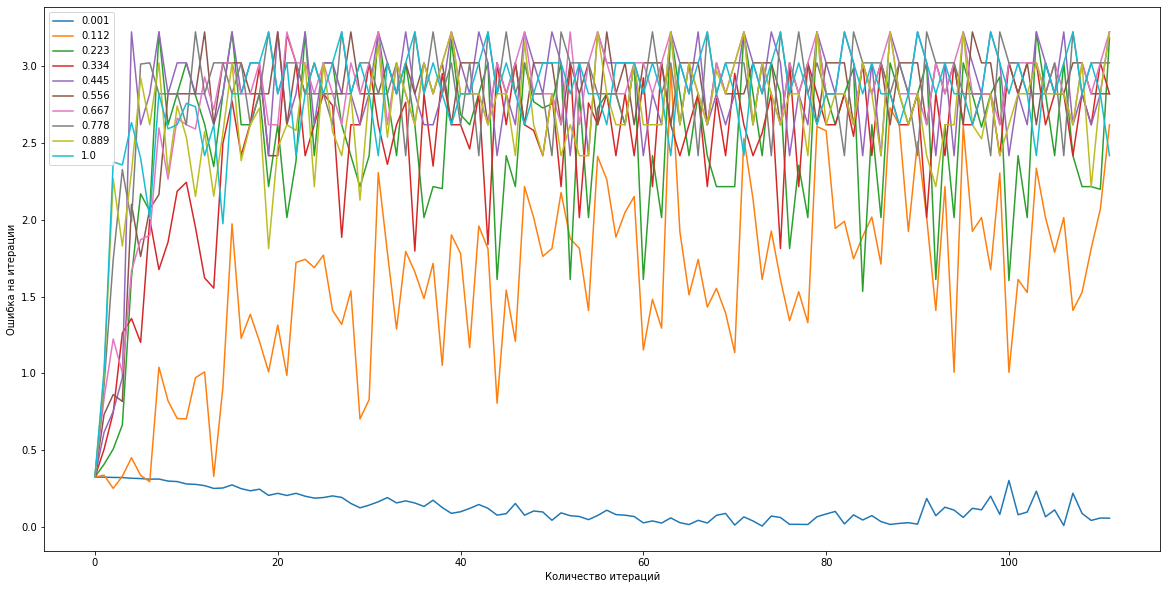

In [362]:
opt_learning_rate = np.linspace(0.001, 1, 10)

plt.figure(figsize=(20,10))
plt.xlabel('Количество итераций')
plt.ylabel('Ошибка на итерации')

#plt.ylim(0, 0.3)
for i in opt_learning_rate:
    plt_loss = train(X, y, tf.train.MomentumOptimizer(learning_rate= i, momentum=0.99).minimize(loss))
    plt.plot(plt_loss, label =i)
    plt.legend(loc='upper left')

Мы видим, что чем меньше learning rate, тем ниже ошибка. Поищем в других интервалах

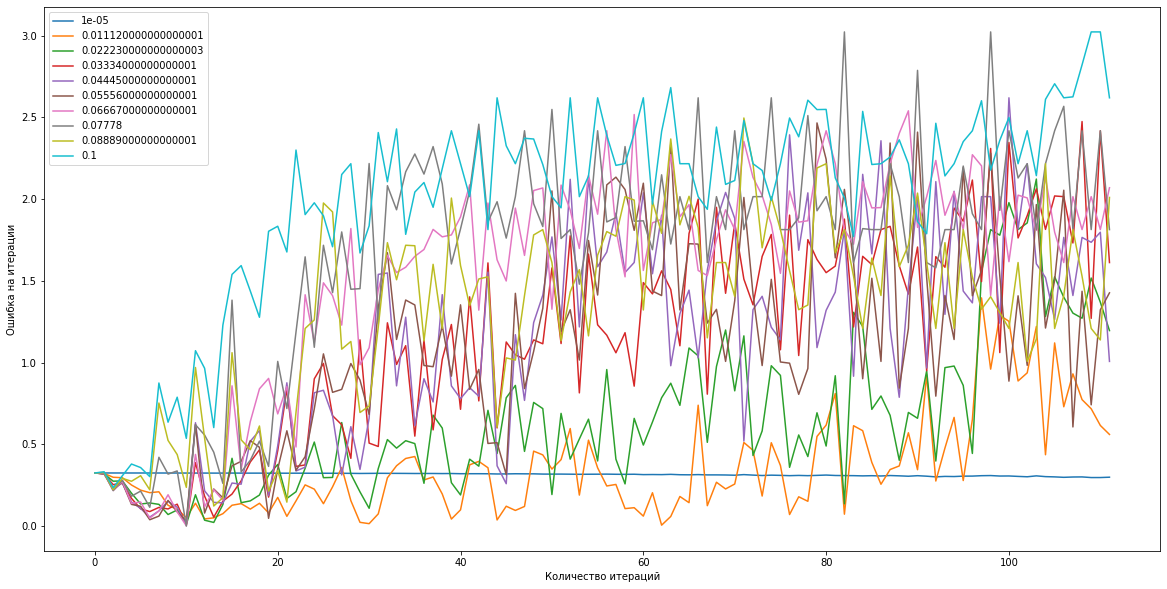

In [363]:
opt_learning_rate = np.linspace(0.00001, 0.1, 10)

plt.figure(figsize=(20,10))
plt.xlabel('Количество итераций')
plt.ylabel('Ошибка на итерации')
#plt.ylim(0, 0.3)
for i in opt_learning_rate:
    plt_loss = train(X, y, tf.train.MomentumOptimizer(learning_rate= i, momentum=0.99).minimize(loss))
    plt.plot(plt_loss, label =i)
    plt.legend(loc='upper left')

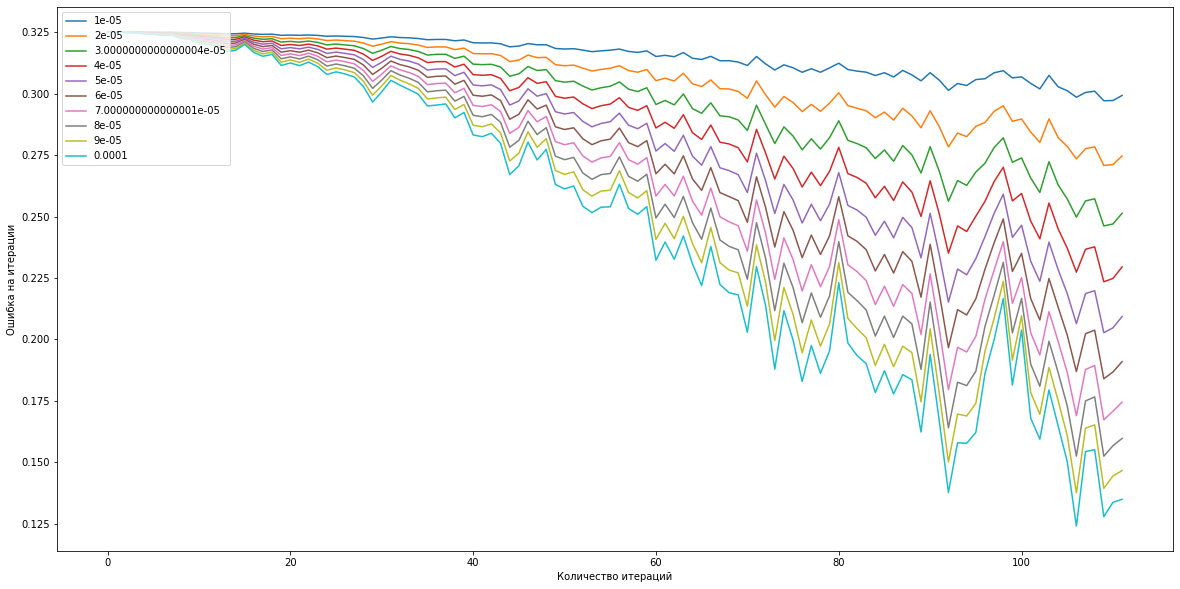

In [364]:
opt_learning_rate = np.linspace(0.00001, 0.0001, 10)

plt.figure(figsize=(20,10))
plt.xlabel('Количество итераций')
plt.ylabel('Ошибка на итерации')
#plt.ylim(0, 0.3)
for i in opt_learning_rate:
    plt_loss = train(X, y, tf.train.MomentumOptimizer(learning_rate= i, momentum=0.99).minimize(loss))
    plt.plot(plt_loss, label =i)
    plt.legend(loc='upper left')

Возьмем тогда разные разряды

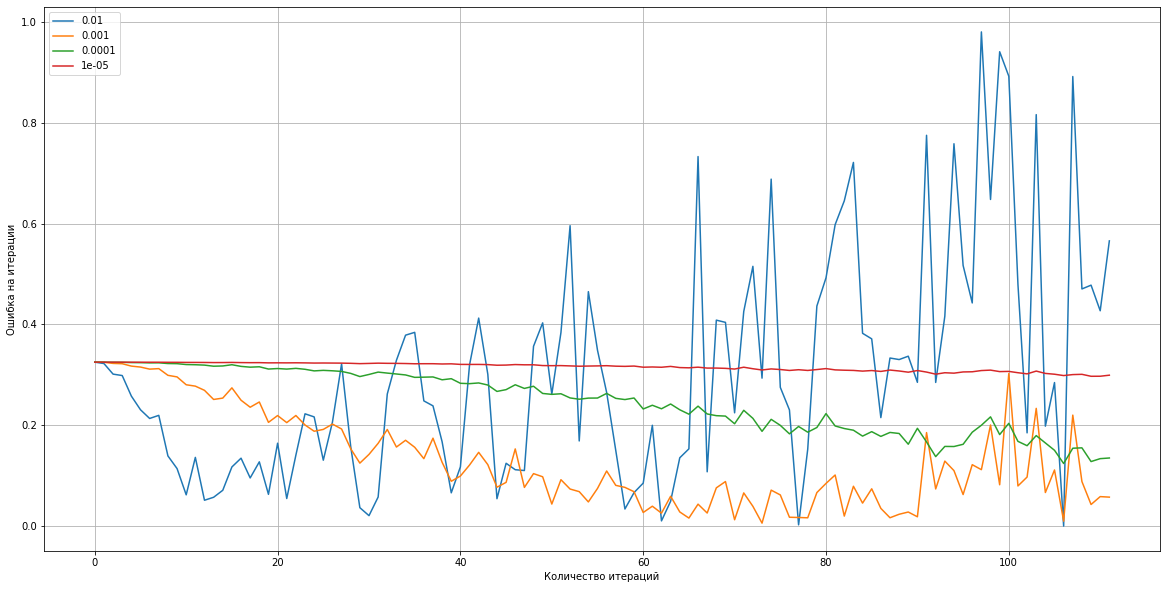

In [365]:
opt_learning_rate = [0.01, 0.001, 0.0001, 0.00001]
plt.figure(figsize=(20,10))
plt.xlabel('Количество итераций')
plt.ylabel('Ошибка на итерации')
plt.grid()


for i in opt_learning_rate:
    plt_loss = train(X, y, tf.train.MomentumOptimizer(learning_rate= i, momentum=0.99).minimize(loss))
    plt.plot(plt_loss, label =i)
    plt.legend(loc='upper left')

В итоге получаем, что learning rate = 0.001 не доходит до минимума, но подходит очень близко к нему и не ошибка не сильно колеблется.

Ваш ответ: 0.001

**Задание 2.3** (0.5 балла) Проделайте то же, что и в пункте выше, но используйте в качестве базового алгоритма оптимизации `Adam` с дефолтными параметрами.

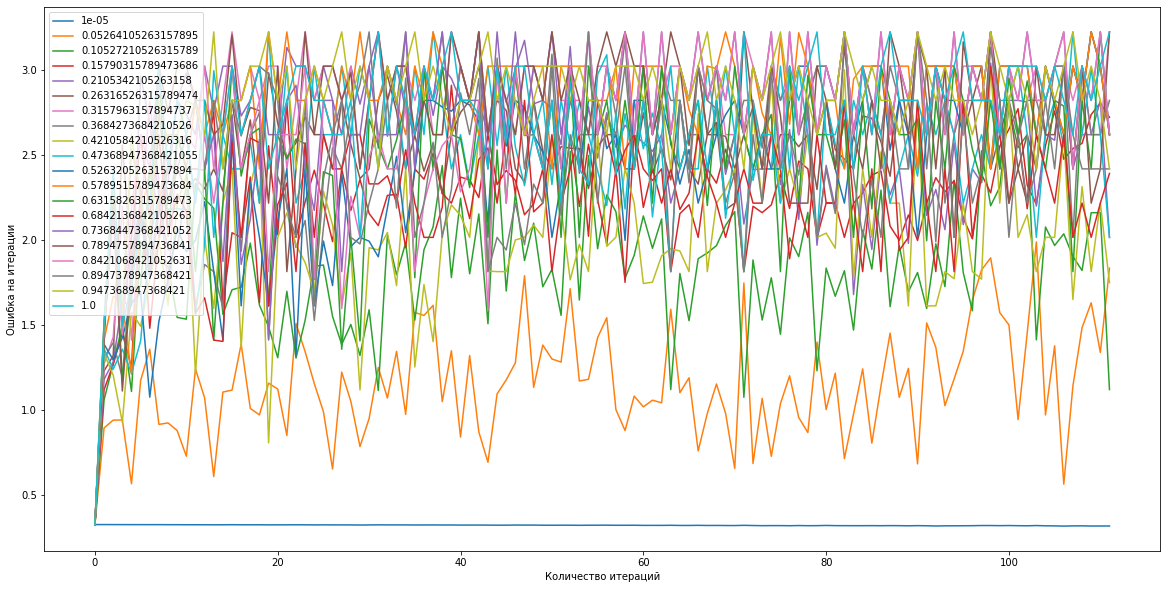

In [366]:
opt_learning_rate = np.linspace(0.00001, 1, 20)

plt.figure(figsize=(20,10))
plt.xlabel('Количество итераций')
plt.ylabel('Ошибка на итерации')
#plt.ylim(0, 0.3)
for i in opt_learning_rate:
    plt_loss = train(X, y, tf.train.AdamOptimizer(learning_rate= i).minimize(loss))
    plt.plot(plt_loss, label =i)
    plt.legend(loc='upper left')

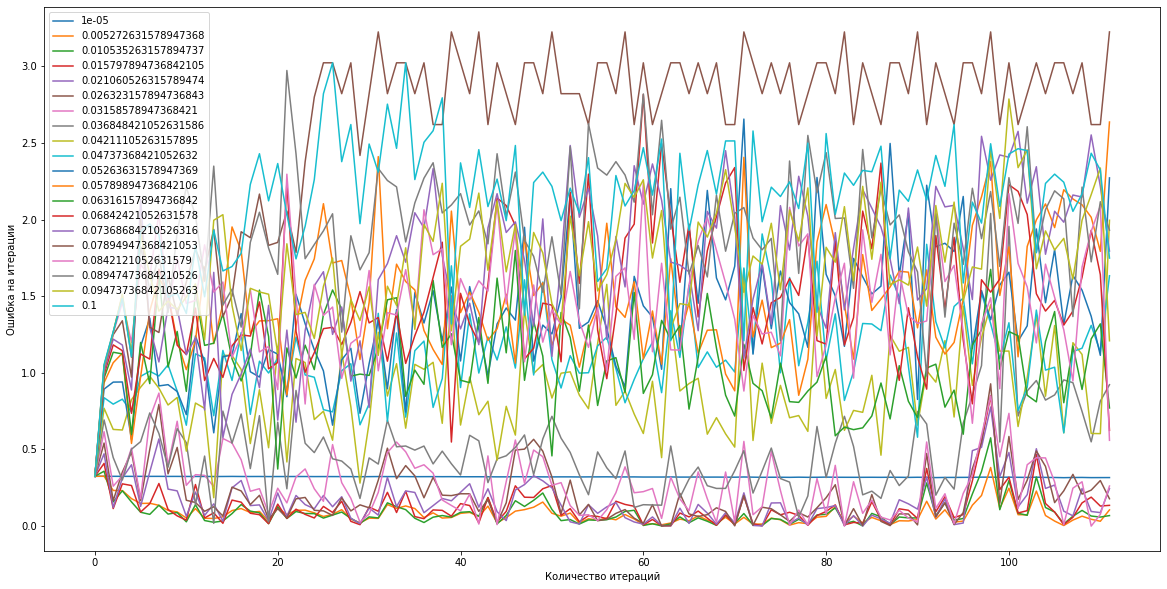

In [367]:
opt_learning_rate = np.linspace(0.00001, 0.1, 20)

plt.figure(figsize=(20,10))
plt.xlabel('Количество итераций')
plt.ylabel('Ошибка на итерации')
#plt.ylim(0, 0.3)
for i in opt_learning_rate:
    plt_loss = train(X, y, tf.train.AdamOptimizer(learning_rate= i).minimize(loss))
    plt.plot(plt_loss, label =i)
    plt.legend(loc='upper left')

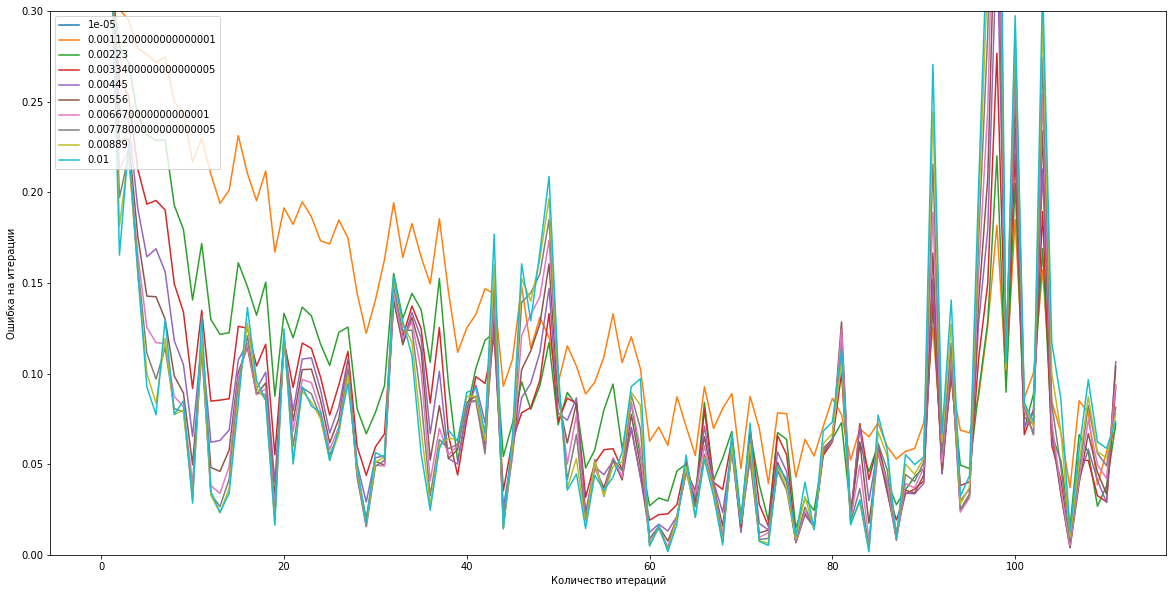

In [368]:
opt_learning_rate = np.linspace(0.00001, 0.01, 10)

plt.figure(figsize=(20,10))
plt.xlabel('Количество итераций')
plt.ylabel('Ошибка на итерации')
plt.ylim(0, 0.3)
for i in opt_learning_rate:
    plt_loss = train(X, y, tf.train.AdamOptimizer(learning_rate= i).minimize(loss))
    plt.plot(plt_loss, label =i)
    plt.legend(loc='upper left')

Ваш ответ: 0.01

**Задание 2.4** (0.5 балла) Сравните алгоритмы `Adam` и `Momentum` для данной задачи. Какой показывает себя лучше?

In [369]:
plt_loss_Adam =  train(X, y, tf.train.AdamOptimizer(learning_rate= 0.01).minimize(loss))
plt_loss_Momentum = train(X, y, tf.train.MomentumOptimizer(learning_rate= 0.001, momentum=0.99).minimize(loss))

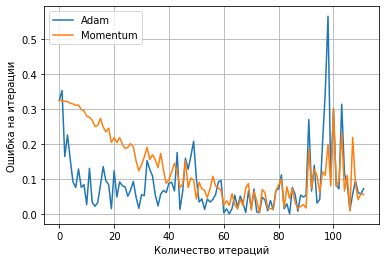

In [370]:
plt.plot(plt_loss_Adam, label='Adam')
plt.plot(plt_loss_Momentum, label='Momentum')

plt.grid()
plt.legend(loc='upper left')
plt.xlabel('Количество итераций')
plt.ylabel('Ошибка на итерации')
plt.show()

Ваш ответ: Adam

## Задание 3 -- наша первая нейросеть, часть 2 (4 балла).

В этом задании мы напишем нейросеть для работы с датасетом MNIST размера 28х28. Исользовать можно только полносвязные (dense) слои! Для этого мы "вытянем" картинки 28х28 в длинный вектор размера 784.

In [311]:
from mnist import load_dataset

X_train, y_train, X_test, y_test, _, _ = load_dataset()

X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

n_labels = len(np.unique(y_train))

10


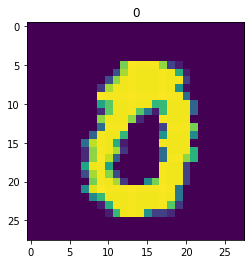

In [314]:
for i in [228, 1437, 322, 420, 69]:
    plt.title(y_train[i])
    plt.imshow(X_train[i].reshape((28, 28)))
    #plt.show()

Подберите архитектуру и алгоритм оптимизации так, чтобы значение accuracy на тестовой выборке было не менее 97.5.

In [325]:
from sklearn.metrics import accuracy_score
tf.reset_default_graph()

def train_and_validate(X_train, y_train, X_test, y_test, train_op, batch_size=16):
    with tf.Session() as sess:
        
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X_train) // batch_size
        n_batch_test = len(X_test) // batch_size
        
        
        for epoch in range(4):
            
            loss_history_train = []
            for b in range(n_batch_train):
                tf.set_random_seed(105)
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X_train[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_train[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_train.append(loss_)

        for epoch in range(1):
            
            loss_history_test = []
            prediction_history = []
            for b in range(n_batch_test):
                tf.set_random_seed(105)
                loss_, predicted_ = sess.run([loss, predicted], feed_dict={X_input: X_test[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_test[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_test.append(loss_)
                prediction_history += predicted_.argmax(-1).tolist()
                
            print("Test accuracy: ", accuracy_score(y_test, prediction_history))
    return loss_history_train, loss_history_test

X_input = tf.placeholder("float32", (None, 784)) # dim = [batch_size, 784]
y_input = tf.placeholder("int32", (None,)) # dim = [batch_size,]


layer1 = tf.layers.dense(X_input, 256, activation=tf.nn.relu) #512
layer2 = tf.layers.dense(layer1, 256, activation=tf.nn.relu) # 258
layer3 = tf.layers.dense(layer2, 1024, activation=tf.nn.sigmoid)
logits = tf.layers.dense(layer3, n_labels)
predicted = tf.nn.softmax(logits)


loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=tf.one_hot(y_input, depth=n_labels))

train_op = tf.train.AdamOptimizer().minimize(loss)

loss_history_train, loss_history_test = train_and_validate(X_train, y_train, X_test, y_test, train_op)

Test accuracy:  0.977


Я использовал четыре эпохи, поскольку за одну - сеть проходит лишь один раз вперед и назад, тем самым меняя матрицу весов лишь один раз, поэтому я использовал большее количество, дабы добиться результата accuracy 0,977

<img src="test_ac.png" alt="Drawing" style="width: 400px;"/>

## Задание 4 (0.1 баллов).

**Задание 4.1**. (0.1 баллов) Оставьте ниже смешную картинку (желательно про машинное обучение). Лучшую картинку мы поставим на аватарку чатика "Флуд про ИАД".

У меня изначально было 6 слоев :)
<img src="n9fgba8b0qr01.png" alt="Drawing" style="width: 400px;"/>

**Задание 4.2**. Напишите ниже фидбек по заданию и по курсу в целом. 

Было бы интереснее написать нейросеть самостоятельно, заменив из семинара функции потерь, чтобы мы могли подумать, что да как (наверное, про это будет следующее дз). Нравится, что лекции онлайн, но не хватает лекций с Соколовым на Покровке.